In [1]:
import os 
import mne 
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
from scipy import signal
%matplotlib qt

In [2]:
fp=glob('Cropped Data/*.fif')
print(len(fp))

181


In [3]:
hfp= [i for i in fp if 'H' in i.split('\\')[1]]
pfp= [i for i in fp if 'M' in i.split('\\')[1]]

In [4]:
raw= mne.io.read_raw_fif(fp[0])
raw.ch_names

Opening raw data file Cropped Data\6921143_H S15 EO.fif...
Isotrak not found
    Range : 0 ... 25600 =      0.000 ...   100.000 secs
Ready.


C:\Users\Kaif\AppData\Local\Temp\ipykernel_22976\540056921.py:1: RuntimeWarning: This filename (Cropped Data\6921143_H S15 EO.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw= mne.io.read_raw_fif(fp[0])


['EEG Fp1-LE',
 'EEG F3-LE',
 'EEG C3-LE',
 'EEG P3-LE',
 'EEG O1-LE',
 'EEG F7-LE',
 'EEG T3-LE',
 'EEG T5-LE',
 'EEG Fz-LE',
 'EEG Fp2-LE',
 'EEG F4-LE',
 'EEG C4-LE',
 'EEG P4-LE',
 'EEG O2-LE',
 'EEG F8-LE',
 'EEG T4-LE',
 'EEG T6-LE',
 'EEG Cz-LE',
 'EEG Pz-LE']

In [5]:
for i in raw.ch_names:
    print(i.split(" ")[1])

Fp1-LE
F3-LE
C3-LE
P3-LE
O1-LE
F7-LE
T3-LE
T5-LE
Fz-LE
Fp2-LE
F4-LE
C4-LE
P4-LE
O2-LE
F8-LE
T4-LE
T6-LE
Cz-LE
Pz-LE


In [6]:
mp = {
    'EEG Fp1-LE' : 'Fp1-LE',
 'EEG F3-LE': 'F3-LE',
 'EEG C3-LE': 'C3-LE',
 'EEG P3-LE': 'P3-LE',
 'EEG O1-LE': 'O1-LE',
 'EEG F7-LE': 'F7-LE',
 'EEG T3-LE': 'T3-LE',
 'EEG T5-LE': 'T5-LE',
 'EEG Fz-LE': 'Fz-LE',
 'EEG Fp2-LE': 'Fp2-LE',
 'EEG F4-LE': 'F4-LE',
 'EEG C4-LE': 'C4-LE',
 'EEG P4-LE': 'P4-LE',
 'EEG O2-LE': 'O2-LE',
 'EEG F8-LE': 'F8-LE',
 'EEG T4-LE': 'T4-LE',
 'EEG T6-LE': 'T6-LE',
 'EEG Cz-LE': 'Cz-LE',
 'EEG Pz-LE': 'Pz-LE'
}

In [7]:
def read_data(file_path):
    raw = mne.io.read_raw_fif(file_path, preload = True)
    mne.rename_channels(raw.info, mp)
    loc_file = "Depression-Detection-Using-EEG-main\BioSemi64.loc"
    montage = mne.channels.read_custom_montage(loc_file)
    raw.info.set_montage(montage)
    return raw

In [8]:
%%capture 
healthy_files=[read_data(i) for i in hfp]
patient_files=[read_data(i) for i in pfp]

Using matplotlib as 2D backend.


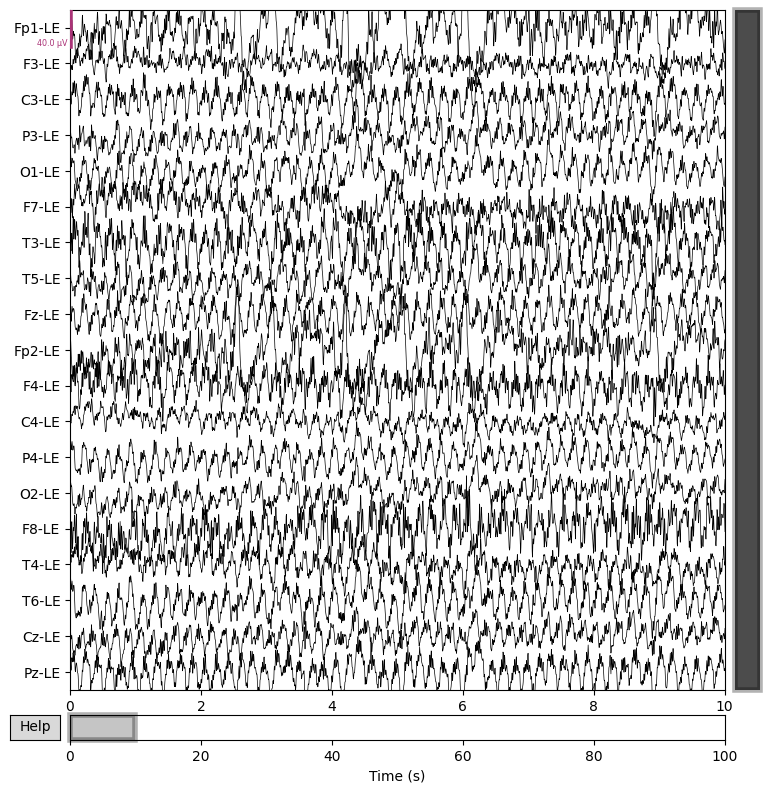

In [9]:
healthy_files[0].plot()

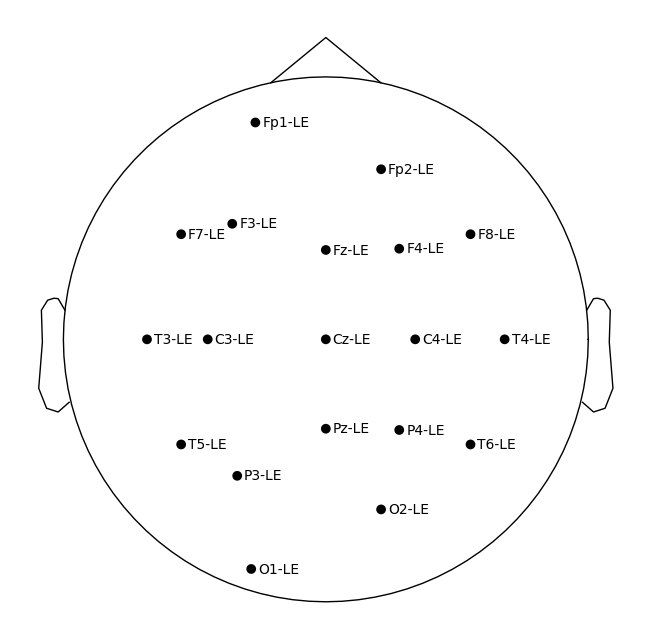

In [10]:
healthy_files[0].plot_sensors(show_names=True, title='EEG Sensor Locations')

In [11]:

CHANNELS = ['Fz', 'Cz', 'P3', 'Pz', 'P4', 'PO7', 'Oz', 'PO8']

In [12]:
def data_processing(filepath, plot=True):
    file = mne.io.read_raw_edf(filepath, preload=True)
    CHANNELS_MAPPING = {ch_name: ch_name.split()[-1].split('-')[0] for ch_name in file.ch_names}
    
    mne.rename_channels(file.info, CHANNELS_MAPPING)

    montage = mne.channels.make_standard_montage('standard_alphabetic')
    file.set_montage(montage, on_missing='ignore')
    file.drop_channels([c for c in file.ch_names if c not in CHANNELS])

    fig, ax = plt.subplots(figsize=(15, 5))
    file.plot_psd(ax=ax)
                        
    data = file.get_data()

#     chan_dict = {}
#     good_data = mne.pick_channels(file.ch_names, include=channels)
#     for ind in good_data:
#         chan_dict[ind] = file.ch_names[ind]
#     print(chan_dict)

    if plot:
        line1, = plt.plot(np.arange(0, 1, 1/256), 
                 data[0][:256], label='raw')
                 
        plt.title(f'{file.ch_names[0]} channel data')
    
    file_filtered = file.copy().filter(l_freq=1, h_freq=20)
    data_filtered = file_filtered.get_data()
    
    if plot:
        line2, = plt.plot(np.arange(0, 1, 1/256), 
                 data_filtered[0][:256], label='filtered')
        
        plt.legend(handles=[line1, line2])
#         plt.title(f'{list(chan_dict.items())[0][1]} channel data')
        plt.show()
    
    fig, ax = plt.subplots(figsize=(15, 5))
    file_filtered.plot_psd(ax=ax)
    return file, file_filtered

In [13]:
original, file_filtered = data_processing('Dataset/H S1 TASK.edf')

Extracting EDF parameters from D:\RND\Depressino Detection\Dataset\H S1 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples (3.301 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [14]:
sfreq = original.info['sfreq']
data_ini, times_ini = original[:-1, int(sfreq * 1):int(sfreq * 10)]

fig = plt.subplots(figsize=(14, 7))
plt.plot(times_ini[:256], data_ini.T[:256]);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Representation of four EEG channels');
plt.legend(original.ch_names[:-1])

In [15]:
sfreq = file_filtered.info['sfreq']
data_ini, times_ini = file_filtered[:-1, int(sfreq * 1):int(sfreq * 10)]

fig = plt.subplots(figsize=(14, 7))
plt.plot(times_ini[:256], data_ini.T[:256]);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Representation of four EEG channels');
plt.legend(file_filtered.ch_names[:-1])

In [16]:
legend_elements = [Line2D([0], [0], color='black', label='original'),
                   Line2D([0], [0], marker='o', color='red', label='downsampled')
                   ]

# Plot a piece of data to see the effects of downsampling
plt.figure(figsize=(15, 5))

n_samples_to_plot = int(0.3 * file_filtered.info['sfreq'])  # plot 0.3 seconds of data
data, times = file_filtered[:, :n_samples_to_plot]
plt.plot(times,data.T, color='black')


# Downsampling
filter_downsamp = file_filtered.copy()
filter_downsamp.resample(50, npad="auto")
print('New data frequency', filter_downsamp.info['sfreq'], 'Hz')

n_samples_to_plot = int(0.3 * filter_downsamp.info['sfreq'])  # plot 0.3 seconds of data
data, times = filter_downsamp[:, :n_samples_to_plot]
plt.plot(times,data.T,'-o', color='red')

plt.xlabel('time (s)')
plt.legend(handles=legend_elements, loc='best')
plt.title('Downsampling of five EEG channels')
plt.show()
# mne.viz.tight_layout()

New data frequency 50.0 Hz


In [17]:
n_samples_to_plot = int(0.5 * filter_downsamp.info['sfreq'])

data_f_1, times_f_1 = filter_downsamp[:, :n_samples_to_plot]
fig = plt.subplots(figsize=(15, 5))
plt.plot(times_f_1, data_f_1.T);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Downsampled data');
plt.legend(filter_downsamp.ch_names);

In [18]:
ica = mne.preprocessing.ICA(random_state=97)
ica.fit(filter_downsamp)

filter_ica = filter_downsamp.copy()
filter_ica.load_data()
_ = ica.plot_sources(filter_ica)

Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 5 components
Fitting ICA took 2.0s.
Creating RawArray with float64 data, n_channels=5, n_times=30250
    Range : 0 ... 30249 =      0.000 ...   604.980 secs
Ready.


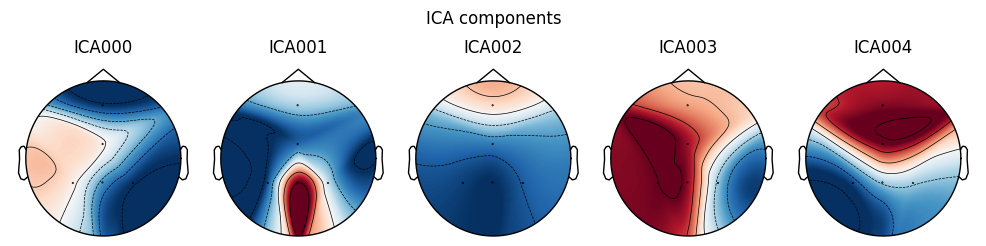

In [19]:
ica.plot_components()

In [20]:
_ = ica.plot_overlay(filter_ica, exclude=[0], picks='eeg')

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 1 ICA component
    Projecting back using 5 PCA components


In [21]:

ica.plot_properties(filter_ica, picks=[0, 2, 4])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
302 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
302 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
302 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [22]:
len(filter_ica.get_data()[3]) / 605
# len(file.get_data()[3])


50.0

In [23]:
max_val = 0
my_peaks = {}
for epoch_s in range(len(filter_ica.get_data()[3])):
    epoch = filter_ica.get_data()[3][epoch_s:min(len(filter_ica.get_data()[3]), 
                                                 epoch_s + 50)]
    if len(epoch) < 49:
        break
    curr_val = max(signal.find_peaks(epoch, 
        height=np.mean(filter_ica.get_data()[3]))[1]['peak_heights'])
#     print(max(signal.find_peaks(epoch, height=np.mean(filter_ica.get_data()[3]))[1]))
    if curr_val > max_val:
        max_val = curr_val
        my_peaks[epoch_s] = max_val
#     break

In [24]:
my_peaks

{0: 2.6167568427369283e-05,
 78: 3.259184484618833e-05,
 2036: 4.8487671181909427e-05,
 25776: 5.094424973312366e-05}

In [25]:

plt.plot(np.arange(0, 3, 1/50), 
         filter_ica.get_data()[3][25776:25776+150], label='raw')

In [28]:
###Sick Patient

In [29]:
original_sick, file_filtered_sick = data_processing('Dataset/MDD S1 TASK.edf')

Extracting EDF parameters from D:\RND\Depressino Detection\Dataset\MDD S1 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 161791  =      0.000 ...   631.996 secs...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples (3.301 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [30]:
sfreq = original_sick.info['sfreq']
data_ini, times_ini = original_sick[:-1, int(sfreq * 1):int(sfreq * 10)]

fig = plt.subplots(figsize=(14, 7))
plt.plot(times_ini[:256], data_ini.T[:256]);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Representation of four EEG channels');
plt.legend(original_sick.ch_names[:-1])

In [31]:
sfreq = file_filtered_sick.info['sfreq']
data_ini, times_ini = file_filtered_sick[:-1, int(sfreq * 1):int(sfreq * 10)]

fig = plt.subplots(figsize=(14, 7))
plt.plot(times_ini[:256], data_ini.T[:256]);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Representation of four EEG channels');
plt.legend(file_filtered_sick.ch_names[:-1])


In [32]:
legend_elements = [Line2D([0], [0], color='black', label='original'),
                   Line2D([0], [0], marker='o', color='red', label='downsampled')
                   ]

# Plot a piece of data to see the effects of downsampling
plt.figure(figsize=(15, 5))

n_samples_to_plot = int(0.3 * file_filtered_sick.info['sfreq'])  # plot 0.3 seconds of data
data, times = file_filtered_sick[:, :n_samples_to_plot]
plt.plot(times,data.T, color='black')


# Downsampling
filter_downsamp_sick = file_filtered_sick.copy()
filter_downsamp_sick.resample(50, npad="auto")
print('New data frequency', filter_downsamp_sick.info['sfreq'], 'Hz')

n_samples_to_plot = int(0.3 * filter_downsamp_sick.info['sfreq'])  # plot 0.3 seconds of data
data, times = filter_downsamp_sick[:, :n_samples_to_plot]
plt.plot(times,data.T,'-o', color='red')

plt.xlabel('time (s)')
plt.legend(handles=legend_elements, loc='best')
plt.title('Downsampling of five EEG channels')
plt.show()
# mne.viz.tight_layout()

New data frequency 50.0 Hz


In [33]:
n_samples_to_plot = int(0.5 * filter_downsamp_sick.info['sfreq'])

data_f_1, times_f_1 = filter_downsamp_sick[:, :n_samples_to_plot]
fig = plt.subplots(figsize=(15, 5))
plt.plot(times_f_1, data_f_1.T);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Downsampled data');
plt.legend(filter_downsamp_sick.ch_names);

In [34]:
ica = mne.preprocessing.ICA(random_state=97)
ica.fit(filter_downsamp_sick)

filter_ica_sick = filter_downsamp_sick.copy()
filter_ica_sick.load_data()
_ = ica.plot_sources(filter_ica_sick)

Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 5 components
Fitting ICA took 0.1s.
Creating RawArray with float64 data, n_channels=5, n_times=31600
    Range : 0 ... 31599 =      0.000 ...   631.980 secs
Ready.


D:\python\lib\site-packages\mne\viz\_mpl_figure.py:2365: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(FigureClass=FigureClass, **kwargs)


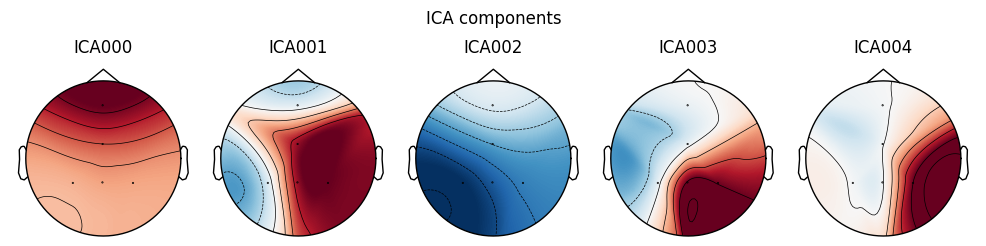

In [35]:

ica.plot_components()

In [36]:
_ = ica.plot_overlay(filter_ica_sick, exclude=[0], picks='eeg')

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 1 ICA component
    Projecting back using 5 PCA components


In [37]:
ica.plot_properties(filter_ica_sick, picks=[0, 2, 4])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
316 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
316 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
316 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [38]:
max_val = 0
my_peaks_sick = {}
for epoch_s in range(len(filter_ica_sick.get_data()[3])):
    epoch = filter_ica_sick.get_data()[3][epoch_s:min(len(filter_ica_sick.get_data()[3]), 
                                                 epoch_s + 50)]
    if len(epoch) < 49:
        break
    curr_val = max(signal.find_peaks(epoch, 
        height=np.mean(filter_ica_sick.get_data()[3]))[1]['peak_heights'])
#     print(max(signal.find_peaks(epoch, height=np.mean(filter_ica.get_data()[3]))[1]))
    if curr_val > max_val:
        max_val = curr_val
        my_peaks_sick[epoch_s] = max_val
#     break

In [39]:
my_peaks_sick

{0: 2.525669066920741e-05,
 431: 2.530373458931929e-05,
 1087: 2.7078011581409355e-05,
 1474: 3.084090574413076e-05,
 4087: 3.1311489318558686e-05,
 4669: 4.1987304398315944e-05,
 4917: 5.222927728802004e-05,
 4919: 0.00010311414298974343,
 4922: 0.000457005487308699}

In [40]:
plt.plot(np.arange(0, 3, 1/50), 
         filter_ica.get_data()[3][4922:4922+150], label='healthy')

plt.plot(np.arange(0, 3, 1/50), 
         filter_ica_sick.get_data()[3][4922:4922+150], label='sick')

Channels marked as bad:
none


In [44]:
#Function to import the dataset, make some cleanups and return the data
montage = mne.channels.make_standard_montage('GSN-HydroCel-128')

def file_importer(path='Dataset\H S1 TASK.edf',type =1):
  """
  Inputs:
  path = Location of the raw file
  type = 1 / 0 indicating raw or mat format
  Outputs:
  Returns the .raw object for EEG
  """
  if type == 1:
    df = mne.io.read_raw_edf(path,verbose=True)
    #Delete the bad signal that we identified
    df.drop_channels('E129')
    #Just set the montage - Though the research institution provided us the montage file, 
    #there are numerous challenges importing the file as the matlab native format is not set in the 
    #mne package. As a result, we will be utilizing make_standard_montage file present in the mne library -- 
    #As the machine that was used is related to 'GSN_HydroCel-129'. However, kindly ensure that we are 
    #deleting the dead signal E129
  else:
    ch_names = ['E'+str(i+1) for i in range(128)]
    sampling_freq = 250
    mat = scipy.io.loadmat(path)
    key = list(mat.keys())
    data = key[3]
    a_mat = mat[data]
    info = mne.create_info(ch_names= ch_names,
                       ch_types='eeg', verbose=None,
                       sfreq=sampling_freq)
    df = mne.io.RawArray(a_mat[:-1,:], info)

  df.set_montage(montage)
  #df = df.pick_channels(ch_names = list(Electrode_map.values()))
  df.plot_psd()
  return df   

In [45]:
raw_erp = file_importer()

Extracting EDF parameters from D:\RND\Depressino Detection\Dataset\H S1 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


ValueError: Channel(s) E129 not found, nothing dropped.

In [46]:
def file_importer(filepath, plot=True):
    file = mne.io.read_raw_edf(filepath, preload=True)
    CHANNELS_MAPPING = {ch_name: ch_name.split()[-1].split('-')[0] for ch_name in file.ch_names}
    
    mne.rename_channels(file.info, CHANNELS_MAPPING)

    montage = mne.channels.make_standard_montage('GSN-HydroCel-128')
    file.set_montage(montage, on_missing='ignore')
    file.drop_channels([c for c in file.ch_names if c not in CHANNELS])

    fig, ax = plt.subplots(figsize=(15, 5))
    file.plot_psd(ax=ax)
                        
    data = file.get_data()

#     chan_dict = {}
#     good_data = mne.pick_channels(file.ch_names, include=channels)
#     for ind in good_data:
#         chan_dict[ind] = file.ch_names[ind]
#     print(chan_dict)

    if plot:
        line1, = plt.plot(np.arange(0, 1, 1/256), 
                 data[0][:256], label='raw')
                 
        plt.title(f'{file.ch_names[0]} channel data')
    
    file_filtered = file.copy().filter(l_freq=1, h_freq=20)
    data_filtered = file_filtered.get_data()
    
    if plot:
        line2, = plt.plot(np.arange(0, 1, 1/256), 
                 data_filtered[0][:256], label='filtered')
        
        plt.legend(handles=[line1, line2])
#         plt.title(f'{list(chan_dict.items())[0][1]} channel data')
        plt.show()
    
    
    fig, ax = plt.subplots(figsize=(15, 5))
    file_filtered.plot_psd(ax=ax)
    return file, file_filtered


In [47]:
original, file_filtered =file_importer('Dataset/H S1 TASK.edf')

Extracting EDF parameters from D:\RND\Depressino Detection\Dataset\H S1 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples (3.301 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window s

C:\Users\Kaif\AppData\Local\Temp\ipykernel_22976\3585604082.py:12: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  file.plot_psd(ax=ax)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Kaif\AppData\Local\Temp\ipykernel_22976\3585604082.py:40: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  file_filtered.plot_psd(ax=ax)


In [48]:
Electrode_map = {'C3':'E36','C4':'E104','F3':'E24','F4':'E124','F7':'E33','F8':'E122',
                 'FP1':'E22','FP2':'E9','O1':'E70','O2':'E83','P3':'E52','P4':'E92',
                 'T3-T7':'E45','T4-T8':'E108','T5-P7':'E58','T6-P8':'E96'}
Electrode_understanding = {'Left-Central':'E36','Right-Central':'E104','Front-Left':'E24','Front-Right':'E124',
                           'Front-Far left':'E33','Front-Far Right':'E122',
                           'Forehead (above left eye)':'E22','Forehead (above Right eye)':'E9',
                           'Back-left to Center':'E70','Back-Right to Center':'E83','Back-Above E70':'E52',
                           'Back-Above E83':'E92','Side Left':'E45','Side Right':'E108','Left':'E58','Right':'E96'}

#Electrodes to pick
list(Electrode_map.values())

['E36',
 'E104',
 'E24',
 'E124',
 'E33',
 'E122',
 'E22',
 'E9',
 'E70',
 'E83',
 'E52',
 'E92',
 'E45',
 'E108',
 'E58',
 'E96']

In [50]:
original2, file_filtered2 =file_importer('Dataset/H S1 TASK.edf')

Extracting EDF parameters from D:\RND\Depressino Detection\Dataset\H S1 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 845 samples (3.301 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window s

C:\Users\Kaif\AppData\Local\Temp\ipykernel_22976\3585604082.py:12: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  file.plot_psd(ax=ax)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Kaif\AppData\Local\Temp\ipykernel_22976\3585604082.py:40: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  file_filtered.plot_psd(ax=ax)


Initial Power distribution
After filtering - Power distribution
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\Kaif\AppData\Local\Temp\ipykernel_22976\1300366117.py:16: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_trunct.plot_psd()


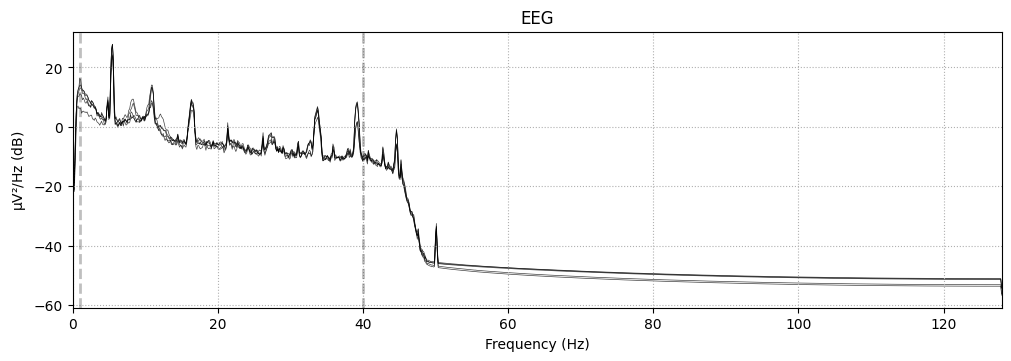

In [58]:
###Designing Band pass filter
sampling_freq = 250
# the EEG data were filtered (bandpass = 1–40 Hz) using a Hamming windowed Sinc FIR filter
l_freq = 1
h_freq = 40
# Applying filters
def raw_trunc(simulated_raw):
  simulated_raw =simulated_raw.copy().load_data()
  simulated_raw_truc = simulated_raw.filter(l_freq,h_freq,method = 'fir',fir_window = 'hamming')
  return simulated_raw_truc

print("Initial Power distribution")
#raw = file_importer()
print("After filtering - Power distribution")
raw_trunct = raw_trunc(original)
raw_trunct.plot_psd()

In [62]:
def butter_bandpass_filter(data):
  """
  Inputs :
  data -Raw eeg data
  lowcut-low pass frequency
  highcut-high pass frequency
  fs-sampling frequenct
  Order - Order at which filter needs to be designed
  Outputs:
  y - Filtered signal
  """
  fs = 256                                # Sampling rate (256 Hz)
  eeg_bands = {'delta':(1,4),
               'Theta': (4, 8),
               'Alpha': (8, 12),
               'Beta': (12, 30),
               'Gamma': (30, 45),
               'Normal':(0,40)}
  # Get real amplitudes of FFT (only in postive frequencies)
  fft_vals = np.absolute(np.fft.rfft(data))
  # Get frequencies for amplitudes in Hz
  fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)

  # Take the mean of the fft amplitude for each EEG band
  eeg_band_mean = dict()
  eeg_band_median = dict()
  eeg_band_max = dict()
  eeg_band_min = dict()
  eeg_band_fft = dict()
  for band in eeg_bands:  
    freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                      (fft_freq <= eeg_bands[band][1]))[0]
    eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
    eeg_band_median[band] = np.median(fft_vals[freq_ix])
    eeg_band_mean[band] = np.mean(fft_vals[freq_ix])
    eeg_band_max[band] = np.max(fft_vals[freq_ix])
    eeg_band_min[band] = np.min(fft_vals[freq_ix])

  return eeg_band_mean,eeg_band_median,eeg_band_max,eeg_band_min,eeg_band_fft
     

In [63]:
def signal_extractor(df,prefix):
  """
  Input:
  df - .raw object : EEG Waveform data
  prefix - It is used to name the columns
  Output:
  returns 'result'. It is a pandas dataframe with dimensions 149*8 (128 electrodes
  +21 event trigger stim channels (More details to follow) each having 8 features)
  """

  d = df.get_data()  
  ch_names = df.ch_names
  val_dict = dict()
  for i in np.arange(d.shape[0]):
      data = d[i,:]
      eeg_band_mean,eeg_band_median,eeg_band_max,eeg_band_min,eeg_band_fft = butter_bandpass_filter(data)
      mean = eeg_band_mean['Normal']
      max = eeg_band_max['Normal']
      min = eeg_band_min['Normal']
      median = eeg_band_median['Normal']
      alpha = eeg_band_fft['Alpha']
      beta = eeg_band_fft['Beta']
      delta = eeg_band_fft['delta']
      theta = eeg_band_fft['Theta']
      objects = [alpha, beta, delta,theta,mean,max,min,median]
      val_dict[ch_names[i]] = objects
  result = pd.DataFrame(val_dict).T
  result.columns = ['lf_alpha_'+prefix,'lf_beta_'+prefix,'lf_delta_'+prefix,'lf_theta_'+prefix,'lf_mean_'+prefix,'lf_max_'+prefix,'lf_min_'+prefix,'lf_median_'+prefix]
  return result

In [64]:

signal_extractor(original,'one_pat').head()

,lf_alpha_one_pat,lf_beta_one_pat,lf_delta_one_pat,lf_theta_one_pat,lf_mean_one_pat,lf_max_one_pat,lf_min_one_pat,lf_median_one_pat
P3,0.008076,0.002360,0.011458,0.009452,0.004473,0.194691,0.000005,0.002314
Fz,0.005869,0.002190,0.005937,0.011140,0.003737,0.300376,0.000021,0.002048
P4,0.006121,0.002576,0.009955,0.011232,0.004358,0.302188,0.000005,0.002331
Cz,0.006685,0.002167,0.009215,0.009218,0.003978,0.186718,0.000019,0.002127
Pz,0.007964,0.002315,0.011585,0.012146,0.004706,0.306062,0.000009,0.002379


In [72]:
import os
from os import listdir
from os.path import isfile, join

#Visualization and data manipulation libraries
import matplotlib.pyplot as plt
import scipy.io
from scipy.signal import butter, lfilter
import mne
import pandas as pd
import numpy as np
import antropy as ant
import seaborn as sns
sns.set(font_scale=1.2)

#Model development and understanding
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.linear_model import LogisticRegression as lr
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [73]:
### Feature Extraction - Non Linear

def nli_features(df,prefix):
  """
  Input:
  df - .raw object : EEG Waveform data
  prefix - It is used to name the columns
  Output:
  returns 'result'. It is a pandas dataframe with dimensions 149*2 (128 electrodes
  +21 event trigger stim channels (More details to follow) each having 2 features)
  """
  ch_names = df.ch_names
  val_dict = dict()
  overall = raw_trunc(df.copy())
  d = overall.get_data()  
  # Extract Non Linear features
  for i in range(d.shape[0]):
    signal = d[i,:]
    svd_entropy = ant.svd_entropy(signal, normalize=True)
    spectral_entropy = ant.spectral_entropy(signal, sf=250, method='welch', normalize=True)
    perm_entropy = ant.perm_entropy(d[i,:], normalize=True)
    #app_entropy = ant.app_entropy(d[i,:])
    #sample_entropy = ant.sample_entropy(d[i,:])
    
    #objects = [svd_entropy,spectral_entropy,perm_entropy,app_entropy,sample_entropy]
    objects = [svd_entropy,spectral_entropy,perm_entropy]
    val_dict[ch_names[i]] = objects
  result = pd.DataFrame(val_dict).T
  #result.columns = ['nl_svden_'+prefix,'nl_spec_en'+prefix,'nl_permen'+prefix,'nl_appen'+prefix,'nl_sampen'+prefix]
  result.columns = ['nl_svden_'+prefix,'nl_spec_en'+prefix,'nl_permen'+prefix]
  return result  


In [74]:
#Sample output
nli_features(original,'one_pat').head()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


,nl_svden_one_pat,nl_spec_enone_pat,nl_permenone_pat
P3,0.520503,0.518067,0.775536
Fz,0.467208,0.358369,0.737066
P4,0.465357,0.406387,0.740352
Cz,0.535117,0.506245,0.778265
Pz,0.476508,0.433680,0.755673


In [79]:
raw_data = mne.io.read_raw_edf("Dataset\H S1 TASK.edf", preload=True)

Extracting EDF parameters from D:\RND\Depressino Detection\Dataset\H S1 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...


In [80]:
data_copy = raw_data.copy().pick_types(stim=True)

# Plot the specified duration of the data starting from the beginning
# Adjust `start` and `duration` as needed for your specific requirements.
data_copy.plot(start=0, duration=6)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


ValueError: No channels match the selection.